### MA (Moving average)

In [1]:
import pandas as pd
import numpy as np
#
# Create a numpy array of years and sales
#
mrs = pd.read_csv(r"C:\Users\MMM\Downloads\e&f\opsd_germany_daily.csv")

In [2]:
mrs.head()

,Date,Consumption
0,01-01-2006,1069.184
1,02-01-2006,1380.521
2,03-01-2006,1442.533
3,04-01-2006,1457.217
4,05-01-2006,1477.131


In [3]:
mrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
dtypes: float64(1), object(1)
memory usage: 68.6+ KB


In [4]:
mrs['Date'] = pd.to_datetime(mrs['Date'], errors='coerce')

In [5]:
mrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1728 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 68.6 KB


In [6]:
mrs['MA'] = mrs['Consumption'].rolling(window=3).mean()

In [7]:
mrs.head()

,Date,Consumption,MA
0,2006-01-01,1069.184,NaN
1,2006-02-01,1380.521,NaN
2,2006-03-01,1442.533,1297.412667
3,2006-04-01,1457.217,1426.757000
4,2006-05-01,1477.131,1458.960333


In [8]:
mrs=mrs.dropna()

In [9]:
mrs.head()

,Date,Consumption,MA
2,2006-03-01,1442.533,1297.412667
3,2006-04-01,1457.217,1426.757000
4,2006-05-01,1477.131,1458.960333
5,2006-06-01,1403.427,1445.925000
6,2006-07-01,1300.287,1393.615000


In [10]:
mrs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1726 entries, 2 to 4363
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1726 non-null   datetime64[ns]
 1   Consumption  1726 non-null   float64       
 2   MA           1726 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 53.9 KB


<Figure size 1728x864 with 0 Axes>

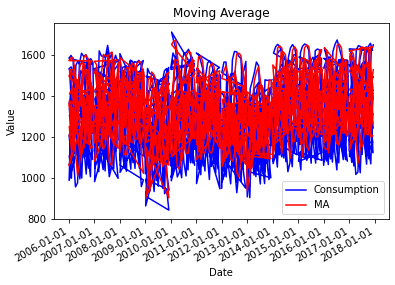

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Assuming 'Date' is already the index, if not, set it using mrs.set_index('Date', inplace=True)
x = mrs.index
y = mrs['Consumption']
y1 = mrs['MA']

plt.figure(figsize=(24,12))

fig, ax = plt.subplots()

ax.plot_date(mdates.date2num(x.to_pydatetime()), y.values, '-', color='Blue', label='Consumption')
ax.plot_date(mdates.date2num(x.to_pydatetime()), y1.values, '-', color='Red', label='MA')

ax.set_title('Moving Average')
ax.set_ylabel('Value')
ax.set_xlabel('Date')
ax.legend()

# Format the x-axis date labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Auto-format the date labels
fig.autofmt_xdate()

plt.show()

# ARIMA (Autoregressive integrated moving average)

In [24]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
!pip install pyramid

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

#load the data
airline = pd.read_csv(r"C:\Users\MMM\Downloads\e&f\international-airline-passengers.csv",header = 0, names = ['Month', 'International airline passengers'])



In [27]:
# Print the first five rows of the dataset 
airline.head() 

,Month,International airline passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [28]:
!pip install statsmodels

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
airline.isna().sum()

Month                               0
International airline passengers    1
dtype: int64

In [31]:
airline=airline.dropna()

In [32]:
airline['Month'] = pd.to_datetime(airline['Month'])
airline.set_index('Month', inplace=True)

In [33]:
result = seasonal_decompose(airline['International airline passengers'], model='additive', period=7)

In [34]:
# To install the library 
!pip install pmdarima 

In [35]:

from pmdarima import auto_arima 

import warnings 
warnings.filterwarnings("ignore") 


stepwise_fit = auto_arima(airline['International airline passengers'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',  
                          suppress_warnings = True,  
                          stepwise = True) 

# To print the summary 
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.46 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.46 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.18 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.29 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.35 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.30 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.10 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.25 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 17 Nov 2023   AIC                           1019.178
Time:                                     22:12:00   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:

train = airline.iloc[:len(airline)-12] 
test = airline.iloc[len(airline)-12:]


from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(train['International airline passengers'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12)) 

result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:     International airline passengers   No. Observations:                  132
Model:               SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.014
Date:                              Fri, 17 Nov 2023   AIC                            896.027
Time:                                      22:12:02   BIC                            909.923
Sample:                                  01-01-1949   HQIC                           901.670
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2977      0.076     -3.924      0.000      -0.446      -0.149
ar.S.L12       0.7104      0.239      2.969      0.003       0.241       1.179
ar.S.L24       0.2887      0.101      2.867      0.004       0.091       0.486
ma.S.L12      -0.9801      2.250     -0.436      0.663      -5.391       3.430
sigma2        88.3257    178.625      0.494      0.621    -261.773     438.424
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

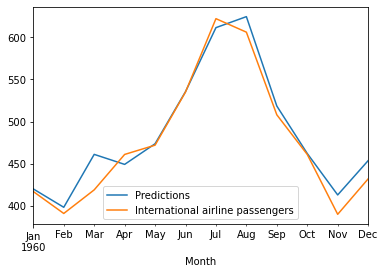

In [37]:
start = len(train) 
end = len(train) + len(test) - 1

# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 

# plot predictions and actual values 
predictions.plot(legend = True) 
test['International airline passengers'].plot(legend = True) 


<AxesSubplot:xlabel='Month'>

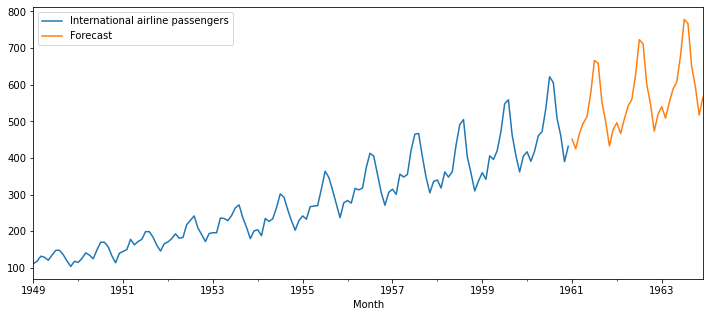

In [38]:
# Train the model on the full dataset 
model = model = SARIMAX(airline['International airline passengers'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12)) 
result = model.fit() 

# Forecast for the next 3 years 
forecast = result.predict(start = len(airline), 
                        end = (len(airline)-1) + 3 * 12, 
                        typ = 'levels').rename('Forecast') 

# Plot the forecast values 
airline['International airline passengers'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 
